# Chapter 5.2

### Genarate densities for the simulated non-normal data shown in Appendix F

In [1]:
import numpy as np
from numpy import linalg as LA 
import matplotlib.pyplot as plt
from pyparsing import col
import seaborn as sns
import pandas as pd

### 1. Generate non-normal covariates $X_i$ by transforming Uniform distribution

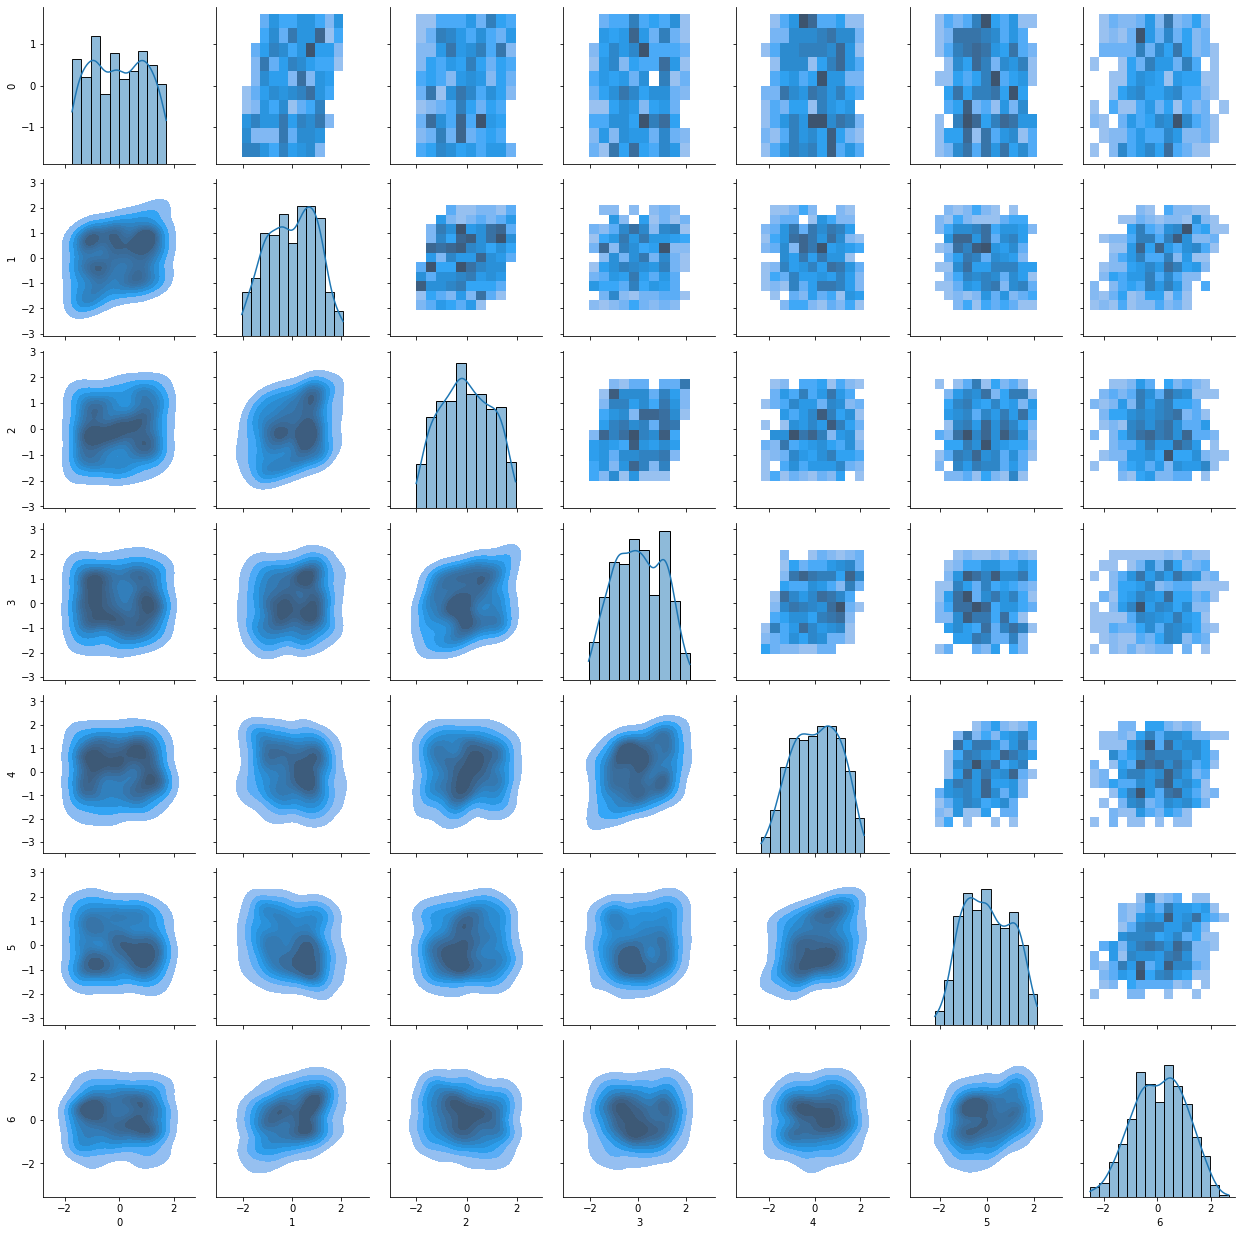

In [7]:
COV_X=np.array([[1, 0.3 ,  0.1 ,  0.05 , 0.1 , -0.06 , 0.1],
[0.3 ,  1  ,  0.3 ,  0.1 , -0.1 , -0.1 ,  0.3],
[0.1 ,  0.3 ,  1 ,   0.3 ,  0.1 ,  0.1 , -0.1], 
[0.05 , 0.1 ,  0.3 ,  1  ,  0.3 , 0.1  , 0.05],
[0.1 , -0.1 ,  0.1 ,  0.3 ,  1 ,  0.3 ,  0.1],
[-0.06, -0.1 ,  0.1, 0.1 ,  0.3 ,  1  ,  0.3], 
[0.1  , 0.3 , -0.1 ,  0.05 , 0.1 , 0.3 , 1 ]])

Z=np.random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=(7, 500)) 
C_x=LA.cholesky(COV_X)
X=C_x@Z 
X_df=pd.DataFrame(X.T)

g = sns.PairGrid(X_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#g.fig.set_size_inches(10,10)
g.add_legend()

### 2. Generate non-normal model noise $U_i$ based on 
#### (1). a symmetrical distribution: Laplace
#### (2). an asymmetrical distribution: $\chi^2$ distribution

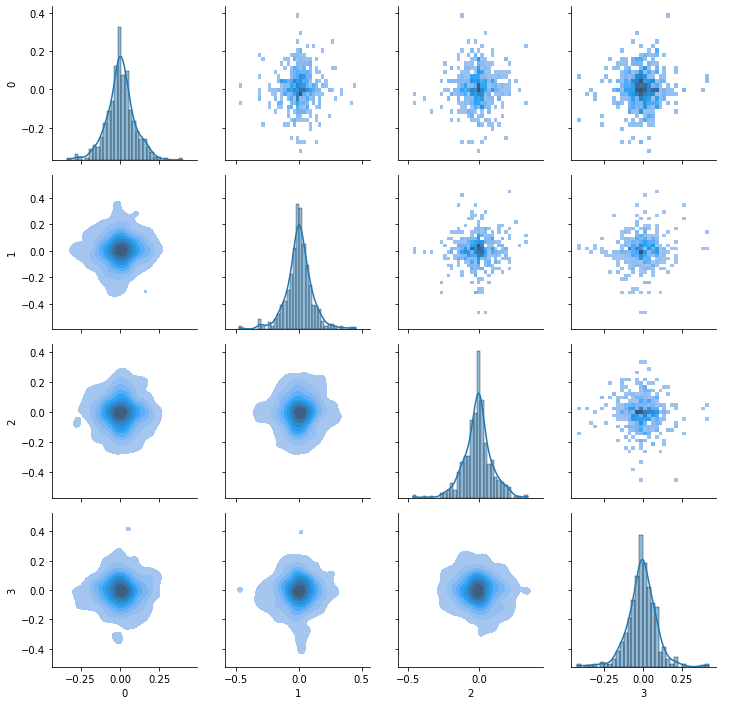

In [6]:
# generate U_i from Laplace distribution
COV_U=np.eye(4)*0.01
U=np.random.laplace(loc=0, scale=np.sqrt(0.01/2), size=(4,500))
U_df=pd.DataFrame(U.T)
g = sns.PairGrid(U_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#g.fig.set_size_inches(15,15)
g.add_legend()

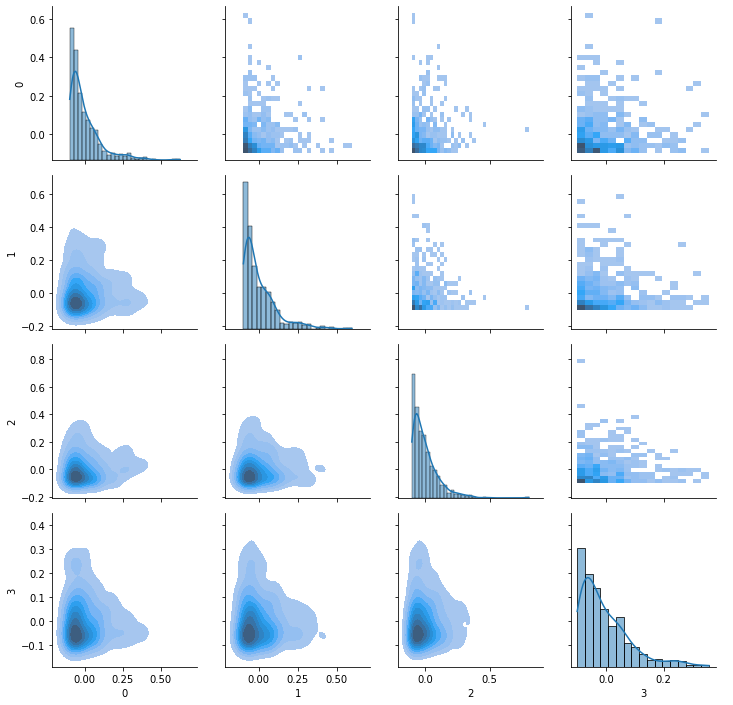

In [4]:
#generate U_i from Chi-square distribution
COV_U=np.eye(4)*0.01
Z=np.random.chisquare(2, size=(4,500))
Z=(Z-2)/2
C_u=LA.cholesky(COV_U)
U=C_u@Z
U_df=pd.DataFrame(U.T)
g = sns.PairGrid(U_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#g.fig.set_size_inches(10,10)
g.add_legend()

### 3. Generate meausrement error noise term $\mathcal{E}_{xi}$ from Gamma distribution for 
#### (1). full type of $\Sigma_{\mathcal{E}_x}$
#### (2). diagonal type of $\Sigma_{\mathcal{E}_x}$
### with error level $\sigma_e^2=0.8$

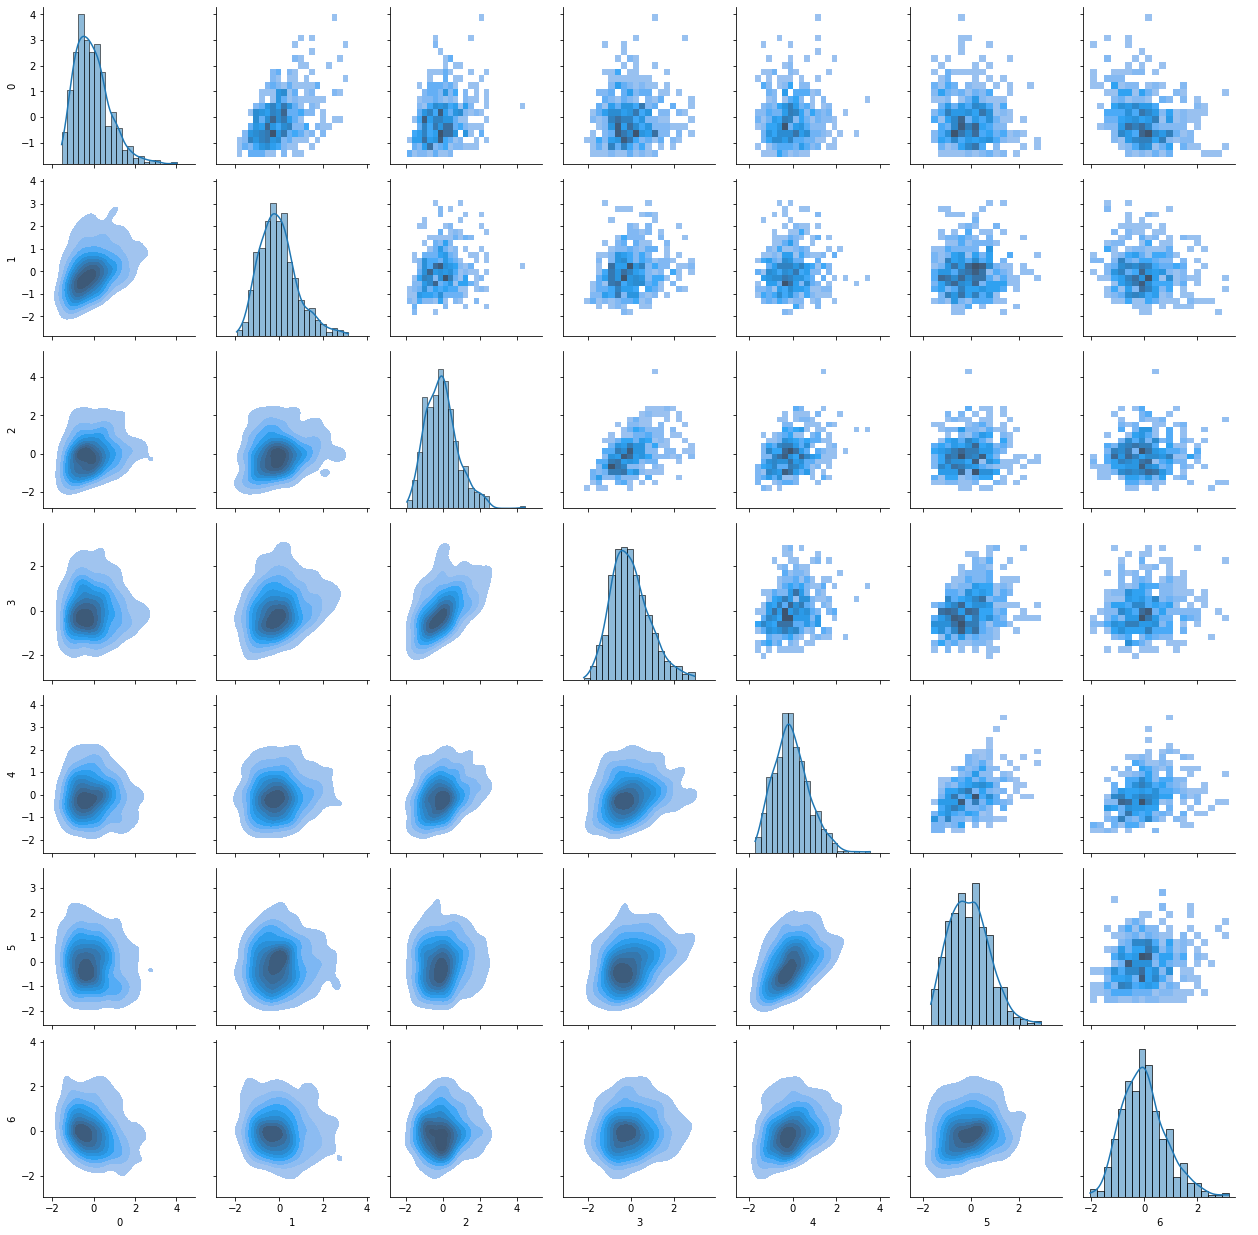

In [11]:
#generate measurement error term from full type of Covariance matrix
COV_Ex=0.8*np.array([[ 0.5 , 0.25, 0.15, 0.05, 0.025, -0.05, -0.15 ],
        [ 0.25, 0.5, 0.125, 0.15, 0.05, 0.025, -0.05 ],
        [ 0.15, 0.125, 0.5,  0.25, 0.15, 0.05, 0.025],
        [ 0.05, 0.15,  0.25, 0.5,  0.125,0.15, 0.05 ],
        [ 0.025,0.05, 0.15, 0.125, 0.5, 0.25, 0.15 ],
        [-0.05, 0.025, 0.05, 0.15,  0.25, 0.5 , 0.125],
        [-0.15, -0.05,  0.025, 0.05,  0.15, 0.125,  0.5]])/0.5
#print(COV_Ex)
Z=np.random.gamma(shape=4, scale=0.5, size=(7,500))
Z=Z-2
C_x=LA.cholesky(COV_Ex)
Ex=C_x@Z
Ex_df=pd.DataFrame(Ex.T)
g = sns.PairGrid(Ex_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#g.fig.set_size_inches(15,15)
g.add_legend()

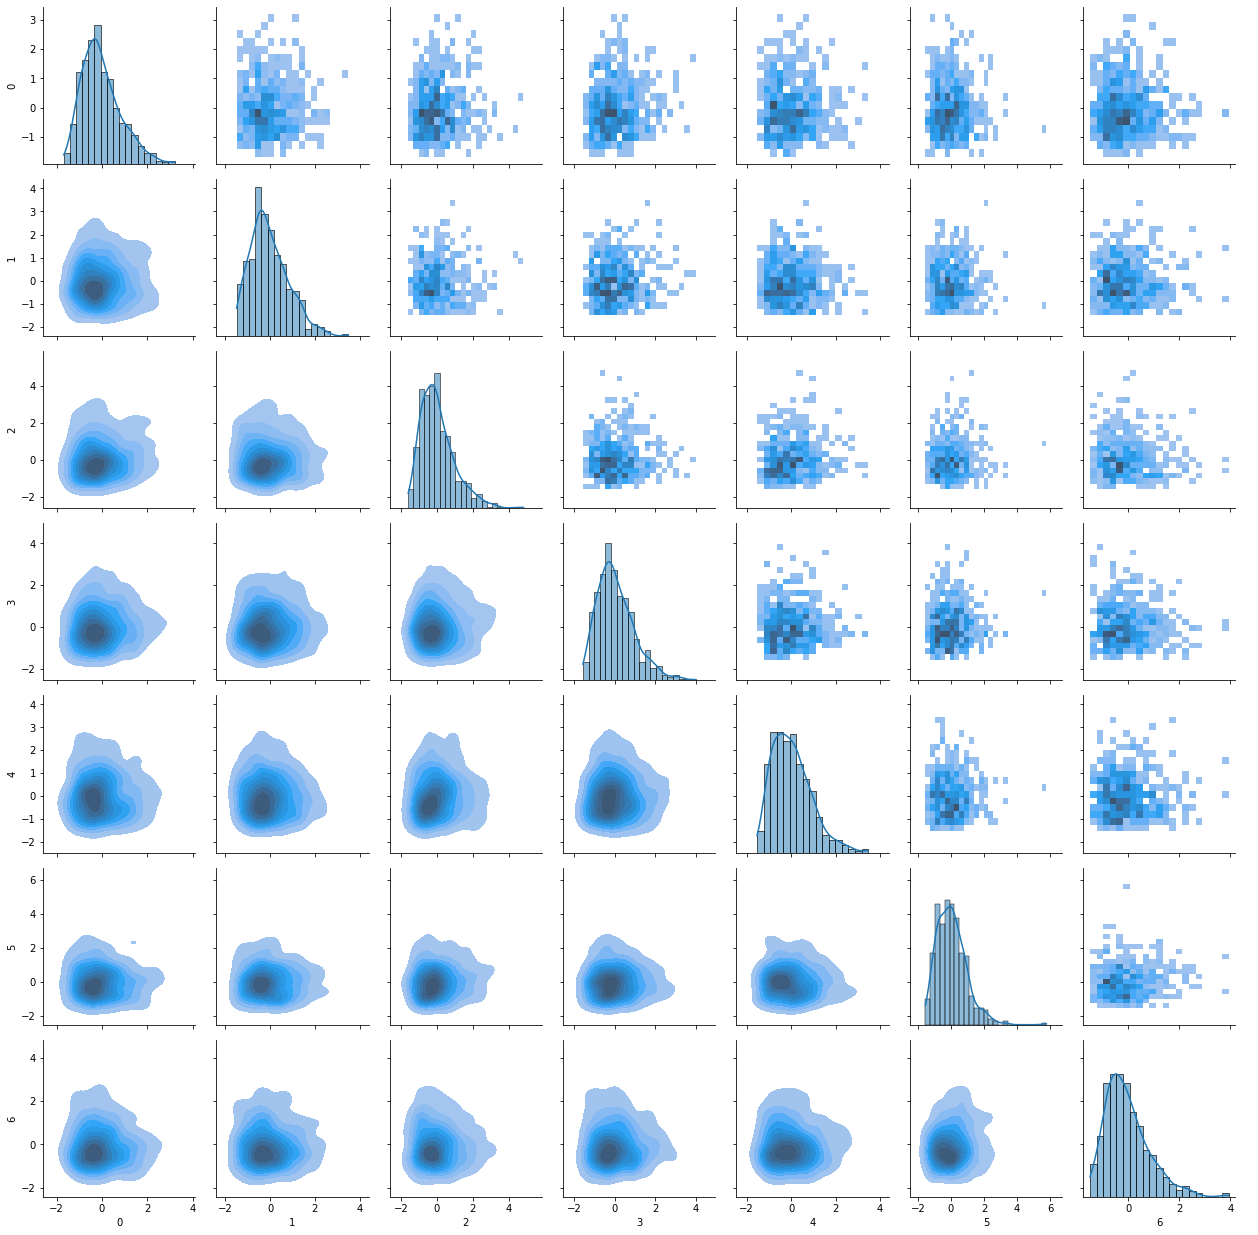

In [12]:
#generate measurement error noise term from diagonal type of Covariance matrix
COV_Ex=np.eye(7)*0.8
Z=np.random.gamma(shape=4, scale=0.5, size=(7,500))
Z=Z-2
C_x=LA.cholesky(COV_Ex)
Ex=C_x@Z
Ex_df=pd.DataFrame(Ex.T)
g = sns.PairGrid(Ex_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
#g.fig.set_size_inches(10,10)
g.add_legend()